In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Покажем, что лежит в корне вашего Drive:
!ls "/content/drive/MyDrive" | head -n 20


Colab Notebooks
download (1).tar.gz
download.tar.gz
image_feature_extraction.ipynb
Infoablauf.gdoc
labels_test.csv
labels_train_clean.csv
labels_train.csv
my_project.zip
resnet18_baseline.pt
Schiffbau lernbuch teil 1 von 3_41-60.gdoc
Schiffbau lernbuch teil 1 von 3_41-60.pdf
Testdaten
Trainingsdaten_over25
Новый документ (1).gdoc
Новый документ.gdoc
Тестовое задание.gdoc


In [ ]:
!ls "/content/drive/MyDrive/Trainingsdaten_over25" | head -n 10


10vx__23139472__20250115_143456630_0000.tiff
10vx__23139472__20250115_143456630_0002.tiff
10vx__23139472__20250115_143456630_0003.tiff
10vx__23139472__20250115_143456630_0005.tiff
10vx__23139472__20250115_143456630_0006.tiff
10vx__23139472__20250115_143456630_0007.tiff
10vx__23139472__20250115_143456630_0009.tiff
10vx__23139472__20250115_143456630_0010.tiff
10vx__23139472__20250115_143456630_0011.tiff
10vx__23139472__20250115_143456630_0012.tiff


In [ ]:
import pandas as pd

# Указываем полный путь к файлу с метками
CSV_PATH = "/content/drive/MyDrive/labels_train.csv"

# Считываем таблицу
df = pd.read_csv(CSV_PATH)

# Посмотрим первые 5 строк: колонки 'image' и 'nozzel_distance'
df.head(5)


,time,image,nozzel_distance
0,0 days 00:00:35.280000,10vx__23139472__20250115_143456630_0882.tiff,-0.6
1,0 days 00:01:46.800000,10vx__23139472__20250115_143456630_2670.tiff,0.2
2,0 days 00:00:46.920000,10vx__23139472__20250115_143456630_1173.tiff,-0.6
3,0 days 00:00:17.240000,10vx__23139472__20250115_143456630_0431.tiff,-0.8
4,0 days 00:01:53.160000,10vx__23139472__20250115_143456630_2829.tiff,0.2


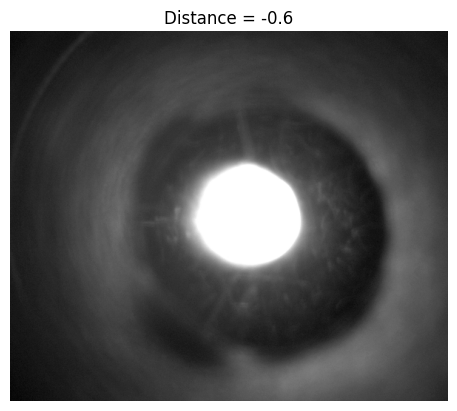

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Берём, например, первую строку (индекс 0) из df
row = df.iloc[0]

# Извлекаем имя файла и расстояние
file_name = row['image']             # например "10vx__23139472__20250115_143456630_0882.tiff"
distance = row['nozzel_distance']     # например -0.6

# Собираем полный путь к изображению в папке Trainingsdaten_over25
img_path = os.path.join("/content/drive/MyDrive/Trainingsdaten_over25", file_name)

# Открываем картинку и переводим в grayscale ('L')
img = Image.open(img_path).convert('L')

# Отображаем с подписью расстояния
plt.imshow(img, cmap='gray')
plt.title(f"Distance = {distance}")
plt.axis('off')
plt.show()


In [ ]:
import os
import pandas as pd

# Пути — измените только при необходимости
CSV_PATH      = "/content/drive/MyDrive/labels_train.csv"
IMG_FOLDER    = "/content/drive/MyDrive/Trainingsdaten_over25"

df = pd.read_csv(CSV_PATH)
missing = []
for fname in df["image"].tolist():
    full = os.path.join(IMG_FOLDER, fname)
    if not os.path.exists(full):
        missing.append(fname)

print(f"Всего записей в CSV: {len(df)}")
print(f"Не найдены в папке (количество = {len(missing)}):")
print(missing[:20])    # первые 20 “пропавших” имён


Всего записей в CSV: 3411
Не найдены в папке (количество = 577):
['10vx__23139472__20250115_143456630_2670.tiff', '10vx__23139472__20250115_143456630_1173.tiff', '10vx__23139472__20250115_143456630_4361.tiff', '10vx__23139472__20250115_143456630_4362.tiff', '10vx__23139472__20250115_143456630_3562.tiff', '10vx__23139472__20250115_143456630_2589.tiff', '10vx__23139472__20250115_143456630_4824.tiff', '10vx__23139472__20250115_143456630_4363.tiff', '10vx__23139472__20250115_143456630_4002.tiff', '10vx__23139472__20250115_143456630_1435.tiff', '10vx__23139472__20250115_143456630_0991.tiff', '10vx__23139472__20250115_143456630_3122.tiff', '10vx__23139472__20250115_143456630_3381.tiff', '10vx__23139472__20250115_143456630_3909.tiff', '10vx__23139472__20250115_143456630_4791.tiff', '10vx__23139472__20250115_143456630_0732.tiff', '10vx__23139472__20250115_143456630_1967.tiff', '10vx__23139472__20250115_143456630_2681.tiff', '10vx__23139472__20250115_143456630_3554.tiff', '10vx__23139472__20250

In [ ]:
import os
import pandas as pd

CSV_PATH   = "/content/drive/MyDrive/labels_train.csv"
IMG_FOLDER = "/content/drive/MyDrive/Trainingsdaten_over25"

df = pd.read_csv(CSV_PATH)

# Оставляем только те строки, у которых файл существует
exists_mask = df["image"].apply(lambda fn: os.path.exists(os.path.join(IMG_FOLDER, fn)))
df_clean    = df[ exists_mask ].reset_index(drop=True)

print(f"Оставили {len(df_clean)} записей из {len(df)} (пропущено {len(df)-len(df_clean)})")

# Сохраним “почищенный” CSV обратно (вариант: в новое имя)
df_clean.to_csv("/content/drive/MyDrive/labels_train_clean.csv", index=False)


Оставили 2834 записей из 3411 (пропущено 577)


In [ ]:
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset

class MeltpoolDataset(Dataset):
    def __init__(self, csv_path, images_folder, transform=None):
        """
        csv_path       -- полный путь к labels_train.csv
        images_folder  -- полный путь к папке с тремя TIFF-файлами, например "/content/drive/MyDrive/Trainingsdaten_over25"
        transform      -- torchvision.transforms для изображений (можно None)
        """
        self.df = pd.read_csv(csv_path)
        self.images_folder = images_folder
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        filename = row['image']                        # имя, например "10vx__23139472__..._0882.tiff"
        img_path = os.path.join(self.images_folder, filename)
        # открываем TIFF и сразу переводим в grayscale
        img = Image.open(img_path).convert('L')
        target = torch.tensor(row['nozzel_distance'], dtype=torch.float32)

        if self.transform is not None:
            img = self.transform(img)
        return img, target


In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from PIL import Image

# ─────────────── 1) Пути ─────────────────────────────────────
CSV_PATH   = "/content/drive/MyDrive/labels_train_clean.csv"
IMG_FOLDER = "/content/drive/MyDrive/Trainingsdaten_over25"

# ─────────────── 2) Класс Dataset ───────────────────────────
class MeltpoolDataset(Dataset):
    def __init__(self, csv_path, images_folder, transform=None):
        self.df = pd.read_csv(csv_path)
        self.folder = images_folder
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.folder, row['image'])
        img = Image.open(img_path).convert('L')
        y   = torch.tensor(row['nozzel_distance'], dtype=torch.float32)
        if self.transform:
            img = self.transform(img)
        return img, y

# ─────────────── 3) Трансформация ──────────────────────────
transform = T.Compose([
    T.Resize((128, 128)),
    T.ToTensor(),      # масштабирует пиксели в [0,1] и добавляет размерность канала
])

# ─────────────── 4) Создаём датасет *именно* так: ───────────
dataset = MeltpoolDataset(
    csv_path=CSV_PATH,
    images_folder=IMG_FOLDER,   # ← не IMG_FOLDEr, не IMAGES_DIR, а тот же самый IMG_FOLDER
    transform=transform
)

# ─────────────── 5) Инициализируем загрузчик ───────────────
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# ─────────────── 6) Проверяем первый батч ─────────────────
imgs_batch, targets_batch = next(iter(loader))
print("Shapes:", imgs_batch.shape, targets_batch.shape)
# ожидаем torch.Size([16, 1, 128, 128]) и torch.Size([16])


Shapes: torch.Size([16, 1, 128, 128]) torch.Size([16])


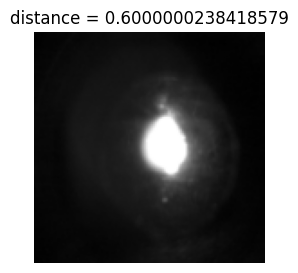

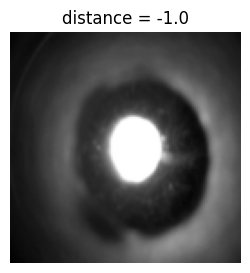

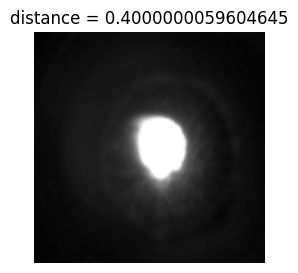

In [ ]:
import matplotlib.pyplot as plt

# Выведем 3 случайных изображения из первого батча:
imgs_batch, targets_batch = next(iter(loader))
for i in range(3):
    img = imgs_batch[i].squeeze(0).numpy()  # (1,128,128) → (128,128)
    dist = targets_batch[i].item()
    plt.figure(figsize=(3,3))
    plt.imshow(img, cmap='gray')
    plt.title(f"distance = {dist}")
    plt.axis('off')
    plt.show()


Определился с фундаментом . Теперь переходим к модели номер 0 .


In [ ]:
# 1) Монтируем Drive (если ещё не сделали)
from google.colab import drive
drive.mount('/content/drive')

# 2) Пути к данным
CSV_PATH   = "/content/drive/MyDrive/labels_train_clean.csv"
IMG_FOLDER = "/content/drive/MyDrive/Trainingsdaten_over25"

# 3) Определяем Dataset (уже знакомый класс)
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader

class MeltpoolDataset(Dataset):
    def __init__(self, csv_path, images_folder, transform=None):
        self.df = pd.read_csv(csv_path)
        self.images_folder = images_folder
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row     = self.df.iloc[idx]
        img_path = os.path.join(self.images_folder, row["image"])
        img     = Image.open(img_path).convert("L")
        y       = torch.tensor(row["nozzel_distance"], dtype=torch.float32)

        if self.transform is not None:
            img = self.transform(img)
        return img, y

# 4) Трансформации: только Resize + ToTensor
import torchvision.transforms as T

transform = T.Compose([
    T.Resize((128, 128)),  # приводим каждый кадр к 128×128
    T.ToTensor(),          # (H,W)→(1,H,W), нормализует в [0,1]
])

# 5) Создаем весь датасет и делим на train/val
full_ds = MeltpoolDataset(csv_path=CSV_PATH,
                          images_folder=IMG_FOLDER,
                          transform=transform)

# 20% на валидацию
val_frac = 0.2
n_val     = int(len(full_ds) * val_frac)
n_train   = len(full_ds) - n_val

train_ds, val_ds = torch.utils.data.random_split(
    full_ds, [n_train, n_val],
    generator=torch.Generator().manual_seed(42)
)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=32, shuffle=False)

# 6) Определяем ResNet-18 как регрессор
import torch.nn as nn
from torchvision.models import resnet18

def get_model():
    model = resnet18(weights=None)
    # меняем первый слой под 1 канал
    model.conv1 = nn.Conv2d(
        in_channels=1, out_channels=64,
        kernel_size=7, stride=2, padding=3, bias=False
    )
    # меняем последний линейный слой на один выход
    model.fc = nn.Linear(512, 1)
    return model

device = "cuda" if torch.cuda.is_available() else "cpu"
model  = get_model().to(device)
loss_fn   = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# 7) Запускаем цикл обучения на 5 эпох
from tqdm.auto import tqdm

best_val_loss = float("inf")
best_epoch    = 0

for epoch in range(1, 6):
    # --- train ---
    model.train()
    train_loss = 0.0
    for xb, yb in tqdm(train_loader, desc=f"Epoch {epoch} [train]"):
        xb, yb = xb.to(device), yb.to(device).unsqueeze(1)
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)
    train_loss /= len(train_loader.dataset)

    # --- val ---
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device).unsqueeze(1)
            pred = model(xb)
            val_loss += loss_fn(pred, yb).item() * xb.size(0)
    val_loss /= len(val_loader.dataset)

    print(f"Epoch {epoch}/5  train_MSE={train_loss:.4f}  val_MSE={val_loss:.4f}")

    # сохраняем лучшую по валидации модель
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch    = epoch
        torch.save(model.state_dict(),
                   "/content/drive/MyDrive/resnet18_baseline.pt")

print(f"\n▶ Лучшая эпоха: {best_epoch}, val_MSE={best_val_loss:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1 [train]:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 1/5  train_MSE=0.1493  val_MSE=0.0293


Epoch 2 [train]:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 2/5  train_MSE=0.0269  val_MSE=0.0145


Epoch 3 [train]:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 3/5  train_MSE=0.0265  val_MSE=0.0132


Epoch 4 [train]:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 4/5  train_MSE=0.0273  val_MSE=0.0046


Epoch 5 [train]:   0%|          | 0/71 [00:00<?, ?it/s]

Epoch 5/5  train_MSE=0.0120  val_MSE=0.0216

▶ Лучшая эпоха: 4, val_MSE=0.0046


In [2]:
# --- 1. Монтируем Google Drive и проверяем доступность файлов/папок ---
from google.colab import drive
import os

drive.mount('/content/drive')

# Убедимся, что путь в Drive правильный. Скорректируйте, если ваша папка лежит глубже,
# например: "/content/drive/MyDrive/МояПапка/Trainingsdaten_over25"
DRIVE_ROOT   = "/content/drive/MyDrive"
CSV_PATH     = os.path.join(DRIVE_ROOT, "labels_train_clean.csv")
IMAGES_DIR   = os.path.join(DRIVE_ROOT, "Trainingsdaten_over25")

# Проверим, что CSV и папка с картинками существуют
assert os.path.isfile(CSV_PATH),     f"Не найден {CSV_PATH}"
assert os.path.isdir(IMAGES_DIR),     f"Не найдена папка {IMAGES_DIR}"

print("✅ Найдены файлы:")
print("   CSV:", CSV_PATH)
print("   Images folder:", IMAGES_DIR)


# --- 2. Импорт всех необходимых библиотек и определение функции get_model() ---
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms as T
from torchvision.models import resnet18
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
from tqdm.auto import tqdm
from sklearn.cluster import DBSCAN
from skimage.morphology import disk

# Если у вас CUDA доступна, поставьте device = "cuda", иначе "cpu"
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

def get_model():
    """
    Возвращает ResNet-18, адаптированную для задачи регрессии:
    - Первый сверточный слой принимает 1-канальное (grayscale) изображение
    - Последний fully-connected слой выдаёт 1 число (MSE-Regression)
    """
    model = resnet18(weights=None)  # без предобученных весов
    # Меняем первый слой conv1: вместо 3 каналов (RGB) → 1 канал
    model.conv1 = nn.Conv2d(
        in_channels=1,    # вход 1-канальный
        out_channels=64,
        kernel_size=7,
        stride=2,
        padding=3,
        bias=False
    )
    # Меняем последний FC: вместо 1000 классов → 1 выход (regression)
    model.fc = nn.Linear(512, 1)
    return model


# --- 3. Определяем классы «масок» для обработки изображений ---
class NozzleMask:
    """
    Закрашивает чёрным (0) круглую область радиуса r с центром (y_c, x_c).
    E.g.: используется для «маскировки» ядра расплава.
    """
    def __init__(self, y_c=250, x_c=320, r=150):
        self.yc = y_c
        self.xc = x_c
        self.r = r
        # Готовим круглый диск радиуса r для маскировки
        self.disk_mask = disk(r)

    def __call__(self, pil_img):
        arr = np.array(pil_img)  # массив H×W
        mask = np.zeros_like(arr, dtype=bool)

        # Определяем координаты прямоугольника, в который вписан диск
        y1, y2 = self.yc - self.r, self.yc + self.r + 1
        x1, x2 = self.xc - self.r, self.xc + self.r + 1

        # Копируем только ту часть диска, которая попадает внутрь изображения
        dy1 = max(0, -y1)
        dx1 = max(0, -x1)
        dy2 = min(arr.shape[0] - y1, 2*self.r+1)
        dx2 = min(arr.shape[1] - x1, 2*self.r+1)

        mask_chunk = self.disk_mask[dy1:dy2, dx1:dx2]
        mask[max(0, y1):min(arr.shape[0], y2),
             max(0, x1):min(arr.shape[1], x2)] = mask_chunk

        # Закрашиваем круг чёрным (0)
        arr[mask] = 0
        return Image.fromarray(arr)


class ThresholdMask:
    """
    Бинаризуем изображение: все пиксели > thresh становятся 255, остальные 0.
    (По сути, превращаем в «маску ярких областей».)
    """
    def __init__(self, thresh=128):
        self.thresh = thresh

    def __call__(self, pil_img):
        arr = np.array(pil_img)
        bin_arr = (arr > self.thresh).astype(np.uint8) * 255
        return Image.fromarray(bin_arr)


class DBSCANMask:
    """
    1) Вычисляем порог: пиксели выше (100*(1-percent)) percentile → топ percent ярких пикселей
    2) Строим кластеры на этих точках (DBSCAN)
    3) Берём крупнейший кластер → сохраняем только его пиксели, остальные обнуляем
    """
    def __init__(self, percent=0.1, eps=2, min_samples=10):
        self.percent = percent
        self.eps = eps
        self.min_samples = min_samples

    def __call__(self, pil_img):
        arr = np.array(pil_img)
        flat = arr.flatten()
        threshold = np.percentile(flat, 100*(1 - self.percent))

        ys, xs = np.where(arr >= threshold)
        if len(ys) == 0:
            return pil_img  # нет ярких пикселей

        pts = np.column_stack([ys, xs])
        clustering = DBSCAN(eps=self.eps, min_samples=self.min_samples).fit(pts)
        labels = clustering.labels_

        # Считаем количество точек в каждом кластере, игнорируя noise (-1)
        valid = labels >= 0
        if not np.any(valid):
            return pil_img

        counts = np.bincount(labels[valid])
        largest_cluster_label = np.argmax(counts)

        mask = np.zeros_like(arr, dtype=bool)
        mask[pts[labels == largest_cluster_label, 0],
             pts[labels == largest_cluster_label, 1]] = True

        out = np.zeros_like(arr)
        out[mask] = arr[mask]
        return Image.fromarray(out)


class BBoxMask:
    """
    На входе берём произвольную функцию seg_func, возвращающую бинарную маску (PIL→0/255).
    Затем:
     1) Преобразуем seg_func(pil_img) → бинарная маска 0/255
     2) Находим минимальную bounding-box вокруг белых пикселей
     3) Обрезаем исходное изображение до этой bounding box
     4) Делаем Resize(128×128)
    Если бинарная маска пустая (нет ни одного белого пикселя), возвращаем просто ресайз всего:
    """
    def __init__(self, seg_func):
        self.seg_func = seg_func

    def __call__(self, pil_img):
        arr = np.array(pil_img)
        # получаем бинарную маску из seg_func (переводим в grayscale и threshold>0)
        seg_mask = np.array(self.seg_func(pil_img).convert('L')) > 0

        if not seg_mask.any():
            # Если нет белых пикселей, просто ресайзим всё изображение
            return pil_img.resize((128, 128))

        ys, xs = np.where(seg_mask)
        y1, y2 = ys.min(), ys.max()
        x1, x2 = xs.min(), xs.max()

        crop = arr[y1:y2+1, x1:x2+1]
        return Image.fromarray(crop).resize((128, 128))


# --- 4. Собираем словарь «масок» + baseline ---
mask_transforms = {
     "all_masks": T.Compose([
        T.Resize((128, 128)),
        ThresholdMask(),
        DBSCANMask(percent=0.1, eps=2, min_samples=10),
        BBoxMask(seg_func=ThresholdMask(thresh=128)),
        T.ToTensor()



    ]),
    "bbox": T.Compose([
        T.Resize((128, 128)),
        BBoxMask(seg_func=ThresholdMask(thresh=128)),
        T.ToTensor()

    ]),
    "threshold": T.Compose([
        T.Resize((128, 128)),
        ThresholdMask(),
        T.ToTensor()

    ]),
    "dbscan": T.Compose([
        T.Resize((128, 128)),
        DBSCANMask(percent=0.1, eps=2, min_samples=10),
        T.ToTensor()
    ])
}


# --- 5. Определяем класс Dataset для нашей задачи ---
class MeltpoolDataset(Dataset):
    """
    Dataset читает CSV и загружает нужный TIFF по имени.
    Возвращает (tensor_image, float32_target).
    """
    def __init__(self, csv_path, img_dir, transform=None):
        self.df = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        fname = row['image']
        img_path = os.path.join(self.img_dir, fname)
        img = Image.open(img_path).convert('L')  # grayscale
        if self.transform:
            img = self.transform(img)
        # Целевая метка (float32)
        y = torch.tensor(row['nozzel_distance'], dtype=torch.float32)
        return img, y


# --- 6. Функция для обучения одной модели с заданным transform и меткой tag ---
def train_model(transform, tag):
    """
    1) Создаём полный датасет full_ds на основе CSV и папки
    2) Делим на 80% train + 20% val (фиксируем seed для воспроизводимости)
    3) Создаём DataLoader для train и val
    4) Обучаем ResNet-18 в режиме регрессии (MSELoss + Adam)
    5) Сохраняем весовую часть модели в Drive: "resnet18_{tag}.pt"
    """
    # 6.1: Создаём полный датасет и делим на train/val
    full_ds = MeltpoolDataset(
        csv_path=CSV_PATH,
        img_dir=IMAGES_DIR,
        transform=transform
    )
    val_frac = 0.20
    n_val = int(len(full_ds) * val_frac)
    n_train = len(full_ds) - n_val

    train_ds, val_ds = torch.utils.data.random_split(
        full_ds,
        [n_train, n_val],
        generator=torch.Generator().manual_seed(42)
    )
    train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
    val_loader   = DataLoader(val_ds,   batch_size=32, shuffle=False)

    # 6.2: Инициализируем модель, loss и optimizer
    model = get_model().to(device)
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    best_val_loss = float('inf')
    best_epoch = -1

    # 6.3: Запускаем 5 эпох
    NUM_EPOCHS = 5
    for epoch in range(1, NUM_EPOCHS + 1):
        # --- Тренировка на training set ---
        model.train()
        train_loss_sum = 0.0
        for xb, yb in tqdm(train_loader, desc=f"{tag} Epoch {epoch} [Train]"):
            xb, yb = xb.to(device), yb.to(device).unsqueeze(1)  # y: (batch,) → (batch,1)
            optimizer.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            optimizer.step()
            train_loss_sum += loss.item() * xb.size(0)

        train_loss = train_loss_sum / len(train_loader.dataset)

        # --- Валидация на validation set ---
        model.eval()
        val_loss_sum = 0.0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device).unsqueeze(1)
                preds = model(xb)
                val_loss_sum += loss_fn(preds, yb).item() * xb.size(0)

        val_loss = val_loss_sum / len(val_loader.dataset)

        print(f"{tag} Epoch {epoch}/{NUM_EPOCHS}  train_MSE={train_loss:.4f}  val_MSE={val_loss:.4f}")

        # 6.4: Сохраняем лучшую модель для данного tag
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            save_path = os.path.join(DRIVE_ROOT, f"resnet18_{tag}.pt")
            torch.save(model.state_dict(), save_path)

    print(f"\n{tag} ▶ Best Epoch: {best_epoch}, val_MSE={best_val_loss:.4f}")
    print("Сохранили: ", os.path.join(DRIVE_ROOT, f"resnet18_{tag}.pt"))
    print("-" * 60 + "\n")


# --- 7. Запускаем обучение для всех вариантов из mask_transforms ---
for tag, tfm in mask_transforms.items():
    print(f"=== TRAINING START: {tag} ===")
    train_model(transform=tfm, tag=tag)
print("=== ALL TRAINING DONE ===")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Найдены файлы:
   CSV: /content/drive/MyDrive/labels_train_clean.csv
   Images folder: /content/drive/MyDrive/Trainingsdaten_over25
Using device: cpu
=== TRAINING START: all_masks ===


all_masks Epoch 1 [Train]:   0%|          | 0/71 [00:00<?, ?it/s]

all_masks Epoch 1/5  train_MSE=0.8372  val_MSE=0.1114


all_masks Epoch 2 [Train]:   0%|          | 0/71 [00:00<?, ?it/s]

all_masks Epoch 2/5  train_MSE=0.0953  val_MSE=0.0723


all_masks Epoch 3 [Train]:   0%|          | 0/71 [00:00<?, ?it/s]

all_masks Epoch 3/5  train_MSE=0.0880  val_MSE=0.0684


all_masks Epoch 4 [Train]:   0%|          | 0/71 [00:00<?, ?it/s]

all_masks Epoch 4/5  train_MSE=0.0771  val_MSE=0.0746


all_masks Epoch 5 [Train]:   0%|          | 0/71 [00:00<?, ?it/s]

all_masks Epoch 5/5  train_MSE=0.0682  val_MSE=0.0788

all_masks ▶ Best Epoch: 3, val_MSE=0.0684
Сохранили:  /content/drive/MyDrive/resnet18_all_masks.pt
------------------------------------------------------------

=== TRAINING START: bbox ===


bbox Epoch 1 [Train]:   0%|          | 0/71 [00:00<?, ?it/s]

KeyboardInterrupt: 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Evaluating resnet18_all_masks.pt:   0%|          | 0/46 [00:00<?, ?it/s]

all_masks    → Test MSE = 0.2712


Evaluating resnet18_bbox.pt:   0%|          | 0/46 [00:00<?, ?it/s]

bbox         → Test MSE = 0.3416


Evaluating resnet18_threshold.pt:   0%|          | 0/46 [00:00<?, ?it/s]

threshold    → Test MSE = 0.3951


Evaluating resnet18_dbscan.pt:   0%|          | 0/46 [00:00<?, ?it/s]

dbscan       → Test MSE = 0.2756

🏆 Лучшая модель: all_masks, Test MSE = 0.2712


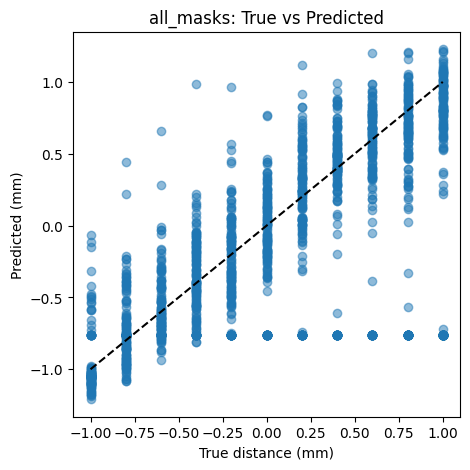

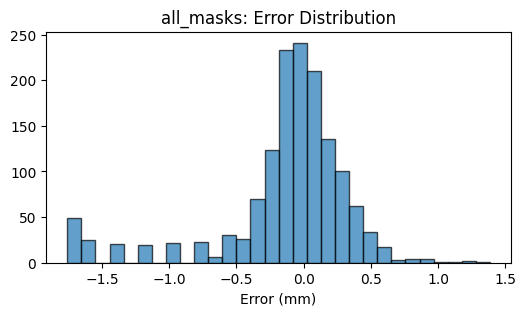

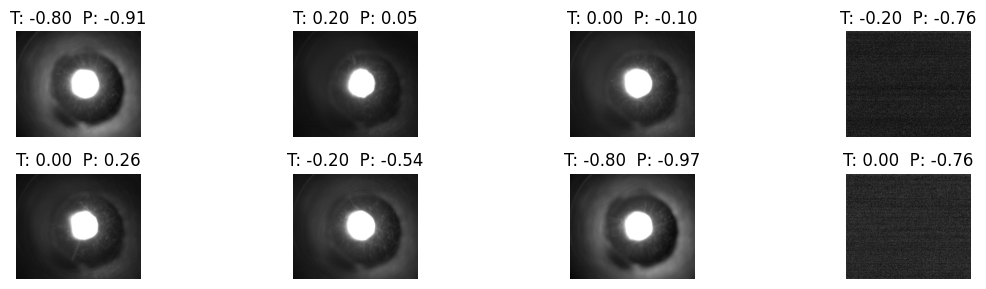

In [9]:
# 1. Монтируем Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Импорты
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from PIL import Image

# 3. Параметры путей
DRIVE_ROOT = "/content/drive/MyDrive"
TEST_CSV   = os.path.join(DRIVE_ROOT, "labels_test.csv")
TEST_IMGS  = os.path.join(DRIVE_ROOT, "Testdaten")

assert os.path.isfile(TEST_CSV), f"Не найден {TEST_CSV}"
assert os.path.isdir(TEST_IMGS),  f"Не найдена папка {TEST_IMGS}"

# 4. Подтягиваем определённые ранее сущности:
#    MeltpoolDataset, get_model, mask_transforms, device

# 5. Функция для оценки и сбора всех предсказаний
def evaluate_and_collect(csv_path, img_dir, weights_path, transform, device):
    df = pd.read_csv(csv_path)
    ds = MeltpoolDataset(csv_path, img_dir, transform=transform)
    loader = DataLoader(ds, batch_size=32, shuffle=False)

    # загрузка модели
    model = get_model().to(device)
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.eval()

    mse_sum = 0.0
    loss_fn = nn.MSELoss(reduction='sum')
    y_trues, y_preds = [], []

    for xb, yb in tqdm(loader, desc=f"Evaluating {os.path.basename(weights_path)}"):
        xb, yb = xb.to(device), yb.to(device).unsqueeze(1)
        with torch.no_grad():
            preds = model(xb)
            mse_sum += loss_fn(preds, yb).item()
        y_trues += yb.cpu().squeeze().tolist()
        y_preds += preds.cpu().squeeze().tolist()

    mse = mse_sum / len(ds)
    return mse, np.array(y_trues), np.array(y_preds)

# 6. Прогоним по всем моделям и соберём результаты
results = {}
collections = {}
for tag, transform in mask_transforms.items():
    weights_file = os.path.join(DRIVE_ROOT, f"resnet18_{tag}.pt")
    assert os.path.isfile(weights_file), f"Не найден {weights_file}"
    mse, y_true, y_pred = evaluate_and_collect(TEST_CSV, TEST_IMGS,
                                               weights_file, transform, device)
    print(f"{tag:12s} → Test MSE = {mse:.4f}")
    results[tag] = mse
    collections[tag] = (y_true, y_pred)

best_tag = min(results, key=results.get)
print(f"\n🏆 Лучшая модель: {best_tag}, Test MSE = {results[best_tag]:.4f}")

# 7. Визуализация качества предсказаний для лучшей модели

y_true, y_pred = collections[best_tag]

# 7.1 Scatter true vs pred
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([-1,1], [-1,1], 'k--')
plt.xlabel("True distance (mm)")
plt.ylabel("Predicted (mm)")
plt.title(f"{best_tag}: True vs Predicted")
plt.show()

# 7.2 Гистограмма ошибок
errors = y_pred - y_true
plt.figure(figsize=(6,3))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Error (mm)")
plt.title(f"{best_tag}: Error Distribution")
plt.show()

# 7.3 Несколько примеров из теста
N = 8
df_test = pd.read_csv(TEST_CSV).head(N)
plt.figure(figsize=(12, 3))
for i, (_, row) in enumerate(df_test.iterrows()):
    img = Image.open(os.path.join(TEST_IMGS, row['image'])).convert("L")
    x   = mask_transforms[best_tag](img)
    pred = y_pred[i]
    true = y_true[i]
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T: {true:.2f}  P: {pred:.2f}")
    plt.axis('off')
plt.tight_layout()
plt.show()



Всего строк в raw test CSV: 1463
254 записей не найдены в /content/drive/MyDrive/Testdaten_over25, их пропустим
Первые пропущенные: ['10vx__23139472__20250115_143456630_1795.tiff', '10vx__23139472__20250115_143456630_2318.tiff', '10vx__23139472__20250115_143456630_1442.tiff', '10vx__23139472__20250115_143456630_0823.tiff', '10vx__23139472__20250115_143456630_4008.tiff']
✅ Сохранён cleaned test CSV: /content/drive/MyDrive/labels_test_clean.csv → 1209 записей


Evaluating resnet18_all_masks.pt:   0%|          | 0/38 [00:00<?, ?it/s]

all_masks    → Clean25 Test MSE = 0.0615


Evaluating resnet18_bbox.pt:   0%|          | 0/38 [00:00<?, ?it/s]

bbox         → Clean25 Test MSE = 0.0347


Evaluating resnet18_threshold.pt:   0%|          | 0/38 [00:00<?, ?it/s]

threshold    → Clean25 Test MSE = 0.0375


Evaluating resnet18_dbscan.pt:   0%|          | 0/38 [00:00<?, ?it/s]

dbscan       → Clean25 Test MSE = 0.0118

🏆 best auf Testdaten_over25: dbscan, MSE = 0.0118


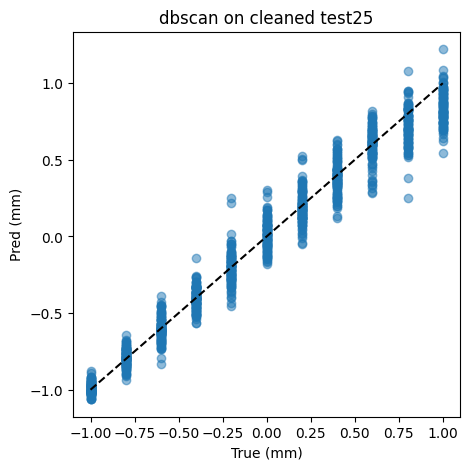

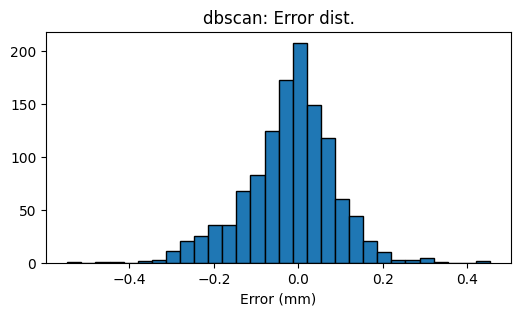

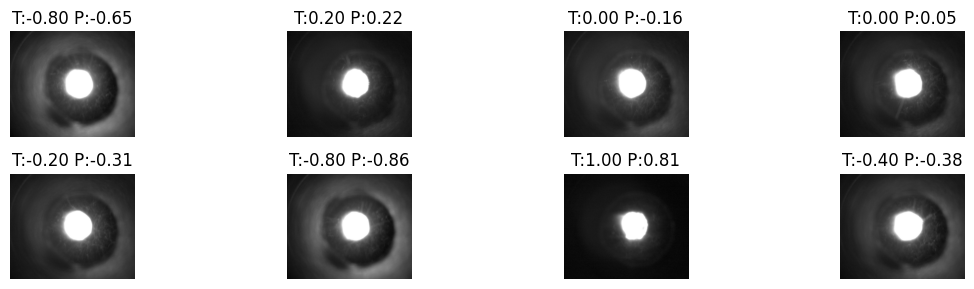

In [13]:
# 1) Создаём «чистый» CSV для теста -------------------------------------------------

import pandas as pd, os

# Пути
DRIVE_ROOT       = "/content/drive/MyDrive"
RAW_TEST_CSV     = os.path.join(DRIVE_ROOT, "labels_test.csv")
TEST_IMGS_CLEAN  = os.path.join(DRIVE_ROOT, "Testdaten_over25")
CLEAN_TEST_CSV   = os.path.join(DRIVE_ROOT, "labels_test_clean.csv")

# Читаем и проверяем
df_test = pd.read_csv(RAW_TEST_CSV)
print("Всего строк в raw test CSV:", len(df_test))

# Фильтрация по наличию файла
exists_mask = df_test['image'].apply(
    lambda fn: os.path.isfile(os.path.join(TEST_IMGS_CLEAN, fn))
)
missing = df_test.loc[~exists_mask, 'image'].tolist()
print(f"{len(missing)} записей не найдены в {TEST_IMGS_CLEAN}, их пропустим")
print("Первые пропущенные:", missing[:5])

# Сохраняем очищенный CSV
df_test_clean = df_test[exists_mask].reset_index(drop=True)
df_test_clean.to_csv(CLEAN_TEST_CSV, index=False)
print("✅ Сохранён cleaned test CSV:", CLEAN_TEST_CSV,
      "→", len(df_test_clean), "записей")

# 2) Оцениваем модели и визуализируем, как раньше, но на cleaned тесте -----------

from tqdm.auto import tqdm
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from PIL import Image

def evaluate_and_collect(csv_path, img_dir, weights_path, transform, device):
    df = pd.read_csv(csv_path)
    ds = MeltpoolDataset(csv_path, img_dir, transform=transform)
    loader = DataLoader(ds, batch_size=32, shuffle=False)

    model = get_model().to(device)
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.eval()

    loss_fn = nn.MSELoss(reduction='sum')
    total_loss = 0.0
    y_true, y_pred = [], []

    for xb, yb in tqdm(loader, desc=f"Evaluating {os.path.basename(weights_path)}"):
        xb, yb = xb.to(device), yb.to(device).unsqueeze(1)
        with torch.no_grad():
            preds = model(xb)
            total_loss += loss_fn(preds, yb).item()
        y_true += yb.cpu().squeeze().tolist()
        y_pred += preds.cpu().squeeze().tolist()

    mse = total_loss / len(ds)
    return mse, np.array(y_true), np.array(y_pred)

# Словарь результатов
results_clean     = {}
collections_clean = {}

for tag, transform in mask_transforms.items():
    wfile = os.path.join(DRIVE_ROOT, f"resnet18_{tag}.pt")
    assert os.path.isfile(wfile), f"Не найден {wfile}"
    mse, y_t, y_p = evaluate_and_collect(
        CLEAN_TEST_CSV, TEST_IMGS_CLEAN, wfile, transform, device
    )
    print(f"{tag:12s} → Clean25 Test MSE = {mse:.4f}")
    results_clean[tag]     = mse
    collections_clean[tag] = (y_t, y_p)

best_tag_clean = min(results_clean, key=results_clean.get)
print(f"\n🏆 best auf Testdaten_over25: {best_tag_clean}, MSE = {results_clean[best_tag_clean]:.4f}")

# Визуализация аналогична предыдущей — scatter, histogram, несколько примеров:
y_true, y_pred = collections_clean[best_tag_clean]

# a) True vs Predicted
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([-1,1],[-1,1],'k--')
plt.title(f"{best_tag_clean} on cleaned test25")
plt.xlabel("True (mm)"); plt.ylabel("Pred (mm)")
plt.show()

# b) Error distribution
errs = y_pred - y_true
plt.figure(figsize=(6,3))
plt.hist(errs, bins=30, edgecolor='k')
plt.title(f"{best_tag_clean}: Error dist.")
plt.xlabel("Error (mm)")
plt.show()

# c) Несколько примеров (8 штук)
N=8
dfv = pd.read_csv(CLEAN_TEST_CSV).head(N)
plt.figure(figsize=(12,3))
for i, (_, row) in enumerate(dfv.iterrows()):
    img = Image.open(os.path.join(TEST_IMGS_CLEAN, row['image'])).convert('L')
    p = y_pred[i]; t = y_true[i]
    plt.subplot(2,4,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T:{t:.2f} P:{p:.2f}")
    plt.axis('off')
plt.tight_layout()
plt.show()


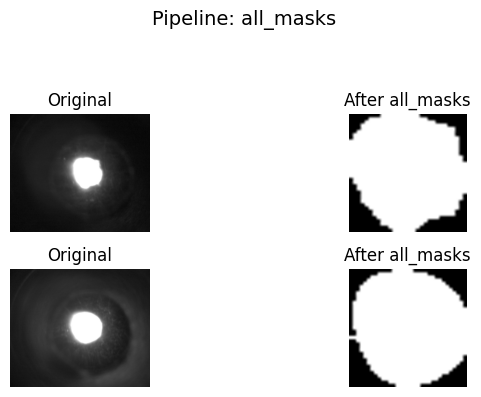

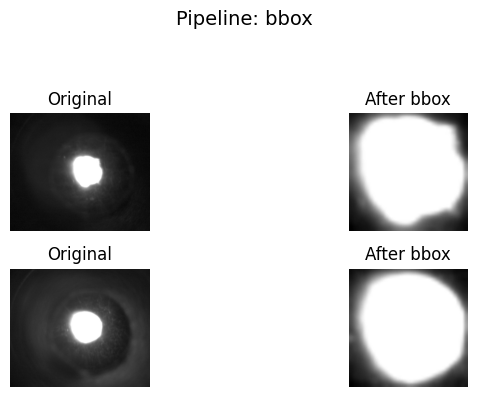

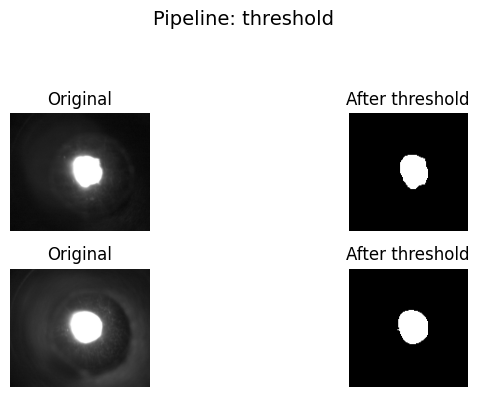

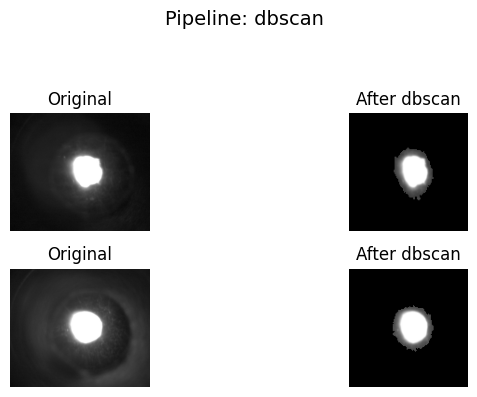

In [20]:
import os, random
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as T

# 1) Путь к очищенным тест-картам
TEST_IMGS_CLEAN = os.path.join(DRIVE_ROOT, "Testdaten_over25")

# 2) Берём 2 случайных файла из папки (существующие .tiff)
all_fns    = [fn for fn in os.listdir(TEST_IMGS_CLEAN) if fn.lower().endswith(".tiff")]
sample_fns = random.sample(all_fns, 2)

# 3) Проходим по всем нашим mask_transforms, кроме nozzle
for tag, compose in mask_transforms.items():
    if tag == "nozzle":
        continue

    # Убираем финальный T.ToTensor(), чтобы остался чисто PIL→PIL pipeline
    pipeline = []
    for t in compose.transforms:
        if isinstance(t, T.ToTensor):
            break
        pipeline.append(t)

    # Визуализируем 2 примера
    fig, axes = plt.subplots(2, 2, figsize=(8, 4))
    fig.suptitle(f"Pipeline: {tag}", fontsize=14)
    for i, fn in enumerate(sample_fns):
        raw = Image.open(os.path.join(TEST_IMGS_CLEAN, fn)).convert("L")
        proc = raw
        # поочерёдно применяем Resize, маски…
        for t in pipeline:
            proc = t(proc)

        ax_raw  = axes[i, 0]
        ax_proc = axes[i, 1]
        ax_raw .imshow(raw,  cmap="gray"); ax_raw .set_title("Original")
        ax_proc.imshow(proc, cmap="gray"); ax_proc.set_title(f"After {tag}")
        for ax in (ax_raw, ax_proc):
            ax.axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()
